# User Engagement Analysis Project

## Overview

This project focuses on the analysis of user engagement data for a platform. The primary objective is to identify and understand adopted users—users who regularly engage with the platform. By identifying adopted users, we aim to gain insights into user behavior and preferences, which can inform business decisions and strategies for improving user retention and engagement.

The project is divided into several key steps:

1. **Data Collection**
2. **Data Preprocessing**
3. **Identifying Adopted Users**
4. **Data Visualization**

By the end of this analysis, we will have a clear understanding of adopted users on the platform and valuable insights into user behavior. These insights can guide business decisions and strategies to enhance user retention and engagement.

This project highlights the power of data analysis in extracting actionable insights from user engagement data, which can be used to optimize user experiences and drive business growth.

Let's dive into the project and explore the findings!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime

In [2]:
df = pd.read_csv('/kaggle/input/takehome-user-engagement/takehome_users.csv', encoding='latin-1')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df.shape

(12000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
df.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [6]:
df1=pd.read_csv('/kaggle/input/takehome-user-engagement/takehome_user_engagement.csv')
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
df1.shape

(207917, 3)

In [9]:
df1.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [10]:
df.rename(columns={'object_id':'user_id'}, inplace=True)

In [11]:
merge_data = pd.merge(df, df1, on='user_id', how='right')
merge_data.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'visited'],
      dtype='object')

**Separate the time_stamp as datetime, week, month, year in new df**

In [12]:
import datetime as datetime

In [13]:
merge_data['date'] = merge_data['time_stamp'].astype('datetime64[ns]')
merge_data['week'] = merge_data['date'].dt.isocalendar().week
merge_data['year'] = merge_data['date'].dt.isocalendar().year
merge_data['month'] = merge_data['date'].dt.month

In [14]:
merge_data.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited,date,week,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,2014-04-22 03:53:30,17,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1,2013-11-15 03:45:04,46,2013,11
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1,2013-11-29 03:45:04,48,2013,11
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1,2013-12-09 03:45:04,50,2013,12
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1,2013-12-25 03:45:04,52,2013,12


In [15]:
groupby_week = merge_data.groupby(['user_id', 'week', 'month', 'year'])['visited'].count().reset_index()

In [16]:
groupby_week.head()

,user_id,week,month,year,visited
0,1,17,4,2014,1
1,2,1,12,2014,1
2,2,2,1,2014,1
3,2,6,2,2014,3
4,2,7,2,2014,2


In [17]:
adopted_user = groupby_week.loc[groupby_week['visited'] >= 3]
len(adopted_user)

32754

In [18]:
adopted_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32754 entries, 3 to 75916
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  32754 non-null  int64 
 1   week     32754 non-null  UInt32
 2   month    32754 non-null  int32 
 3   year     32754 non-null  UInt32
 4   visited  32754 non-null  int64 
dtypes: UInt32(2), int32(1), int64(2)
memory usage: 1.2 MB


In [19]:
groupby_week['adopted_user'] = groupby_week['visited'].apply(lambda x:1 if x>=3 else 0)

In [20]:
groupby_week.head()

,user_id,week,month,year,visited,adopted_user
0,1,17,4,2014,1,0
1,2,1,12,2014,1,0
2,2,2,1,2014,1,0
3,2,6,2,2014,3,1
4,2,7,2,2014,2,0


In [21]:
df3 = groupby_week[(groupby_week['visited'] >= 3)]
df3.head()

,user_id,week,month,year,visited,adopted_user
3,2,6,2,2014,3,1
17,10,1,1,2014,4,1
19,10,2,1,2014,4,1
21,10,3,1,2014,6,1
23,10,4,1,2014,6,1


In [22]:
adopted_count = df3[['user_id', 'adopted_user']][df3['adopted_user']==1].groupby('user_id').count()
print('Number of adopted users:', len(adopted_count))

Number of adopted users: 1416


 # Data Visualisation

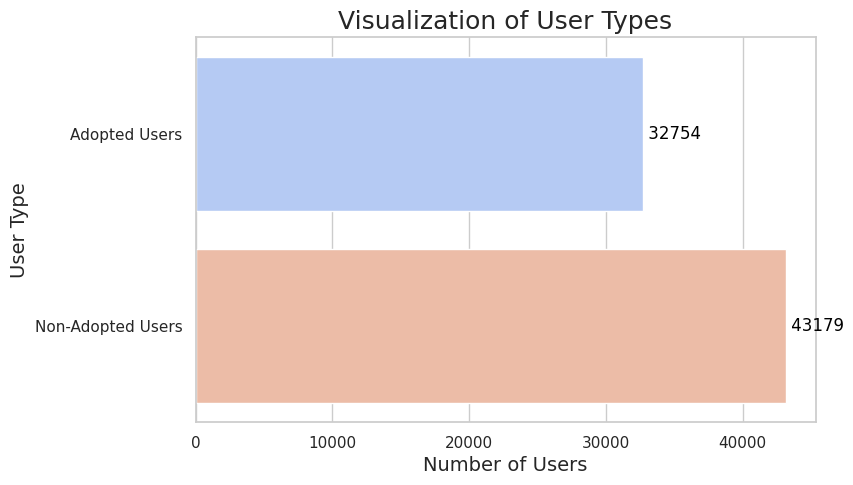

In [23]:
# Data
x = ['Adopted Users', 'Non-Adopted Users']
y = [groupby_week.adopted_user.value_counts()[1], groupby_week.adopted_user.value_counts()[0]]

# Create a horizontal bar plot with Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
plot = sns.barplot(y=x, x=y, palette='coolwarm')
plt.xlabel('Number of Users', fontsize=14)
plt.ylabel('User Type', fontsize=14)
plt.title('Visualization of User Types', fontsize =18)

# Add annotations
for index, value in enumerate(y):
    plt.text(value, index, f' {value}', fontsize=12, va='center', color='black')
plt.show()


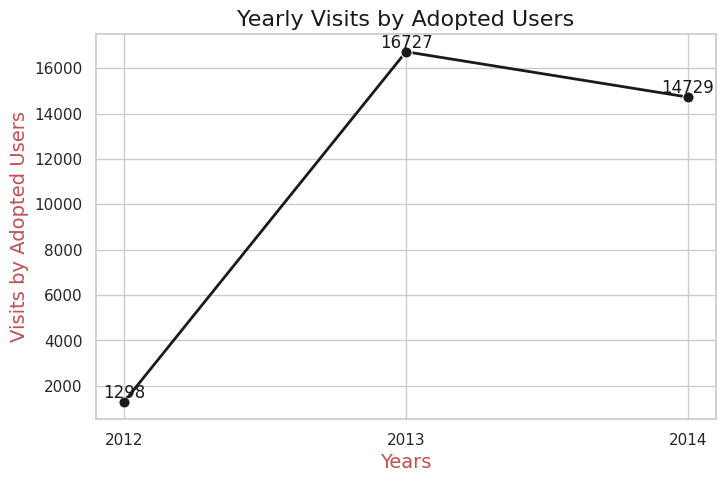

In [24]:

# Data
x = ['2012', '2013', '2014']
q = df3.year.value_counts()
y = [q[2012], q[2013], q[2014]]

plt.figure(figsize=(8, 5))

# Create a line plot with markers using Seaborn
sns.set_style("whitegrid")
sns.lineplot(x=x, y=y, marker='o', color='k', markersize=8, linewidth=2)

# Customize the plot
plt.xlabel('Years', color='r', fontsize=14)
plt.ylabel('Visits by Adopted Users', color='r', fontsize=14)
plt.title('Yearly Visits by Adopted Users', color='k', fontsize=16)

# Annotate data points
for i, j in zip(x, y):
    plt.text(i, j, str(j), ha='center', va='bottom', fontsize=12, color='k')

plt.show()


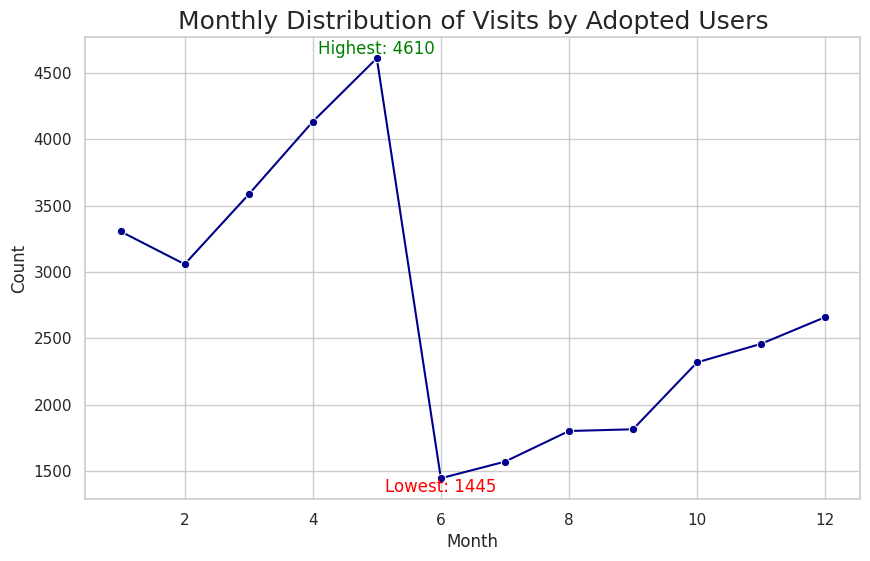

In [25]:

# Data
data = df3.groupby(['month']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create a line plot with Seaborn
sns.set_style("whitegrid")
lineplot = sns.lineplot(data=data, x='month', y='count', marker='o', color='darkblue')

# Find the highest and lowest points
max_point = data['count'].max()
min_point = data['count'].min()
max_month = data.loc[data['count'] == max_point, 'month'].values[0]
min_month = data.loc[data['count'] == min_point, 'month'].values[0]

# Annotate the highest and lowest points
plt.text(max_month, max_point, f'Highest: {max_point}', fontsize=12, va='bottom', ha='center', color='green')
plt.text(min_month, min_point, f'Lowest: {min_point}', fontsize=12, va='top', ha='center', color='red')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Distribution of Visits by Adopted Users', fontsize=18)

plt.grid(True)

plt.show()


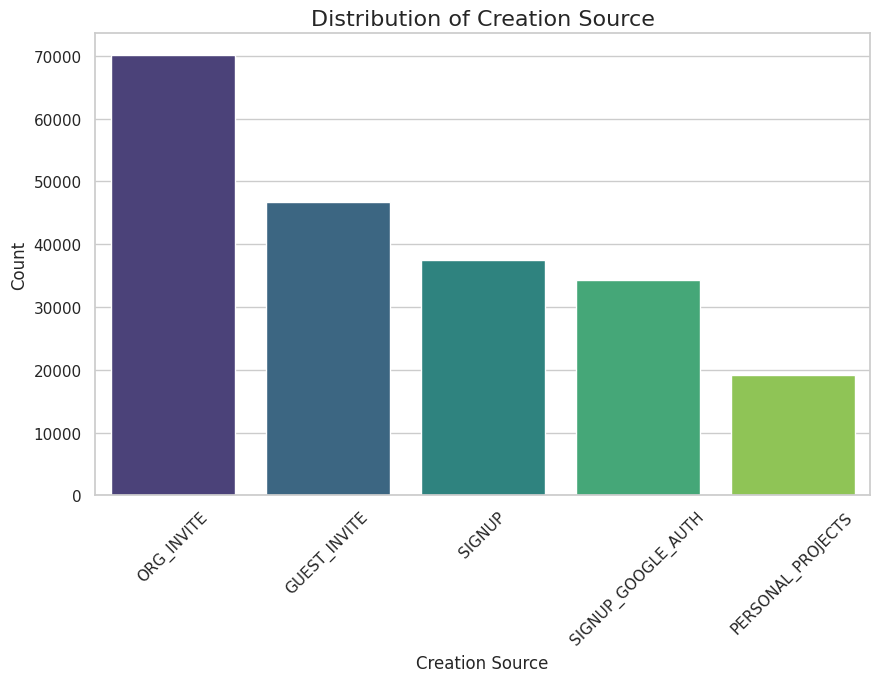

In [26]:
# Grouping and counting data
data = merge_data['creation_source'].value_counts().reset_index()
data.columns = ['Creation Source', 'Count']

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Creation Source', y='Count', data=data, palette='viridis')
plt.title("Distribution of Creation Source", fontsize=16)
plt.xlabel("Creation Source")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


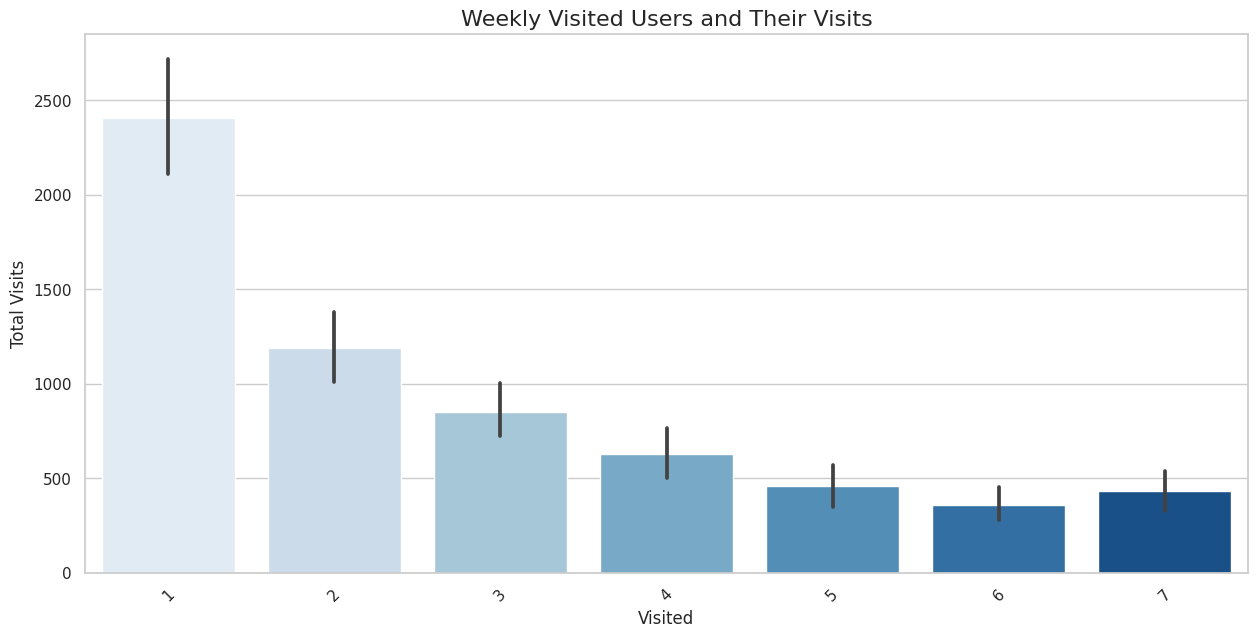

In [27]:
df5=groupby_week
df5= df5.groupby(['visited','month']).size()
df5 = df5.to_frame(name = 'total_visit').reset_index()

# Filter the data for users with at least 3 visits
filtered_data = df5[df5['total_visit'] >= 3]

plt.figure(figsize=(15, 7))
sns.barplot(x='visited', y='total_visit', data=filtered_data, palette='Blues')
plt.title("Weekly Visited Users and Their Visits", fontsize=16)
plt.xlabel("Visited")
plt.ylabel("Total Visits")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


## Project Conclusion

In this data analysis project, we explored user engagement data for a platform, with the goal of identifying adopted users. We followed several steps to achieve this:

1. We started by loading and examining two datasets: `takehome_users.csv` and `takehome_user_engagement.csv`. These datasets contained user information and user engagement data, respectively.

2. We merged the two datasets on the 'user_id' column to create a comprehensive dataset for analysis.

3. We separated the timestamp data into datetime, week, month, and year components to facilitate our analysis.

4. Using the user engagement data, we identified adopted users as those who logged in on at least three separate occasions within a one-week period.

5. The analysis revealed that there were 1,416 adopted users out of the total user base.

6. We created visualizations to provide insights into the data. We visualized the distribution of user types (adopted and non-adopted users), yearly visits by adopted users, monthly distribution of visits by adopted users, and the distribution of creation sources.

In summary, this analysis helped identify and understand adopted users on the platform. It provides valuable insights into user engagement, which can be used to make informed decisions and improve user retention strategies.

This project demonstrates the power of data analysis in understanding user behavior and can serve as a basis for further business decisions and strategies to enhance user engagement and retention.

Thank you for following along with this analysis.
